In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

file_path = "result_120_120_100.txt"
columns = [
    "Workload", "Section", "Power", "Util", "CPU_Power", "Memory_Power", "Network_Power", 
    "Offloading_Ratio", "CPU_Frequency_1", "CPU_Frequency_0.5", "CPU_Frequency_0.25", "CPU_Frequency_0.125"
]
data = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)

tovs = data[data["Section"] == "Tovs"]
offloading = data[data["Section"] == "Offloading"]
dvfs = data[data["Section"] == "DVFS"]
nothing = data[data["Section"] == "Nothing"]

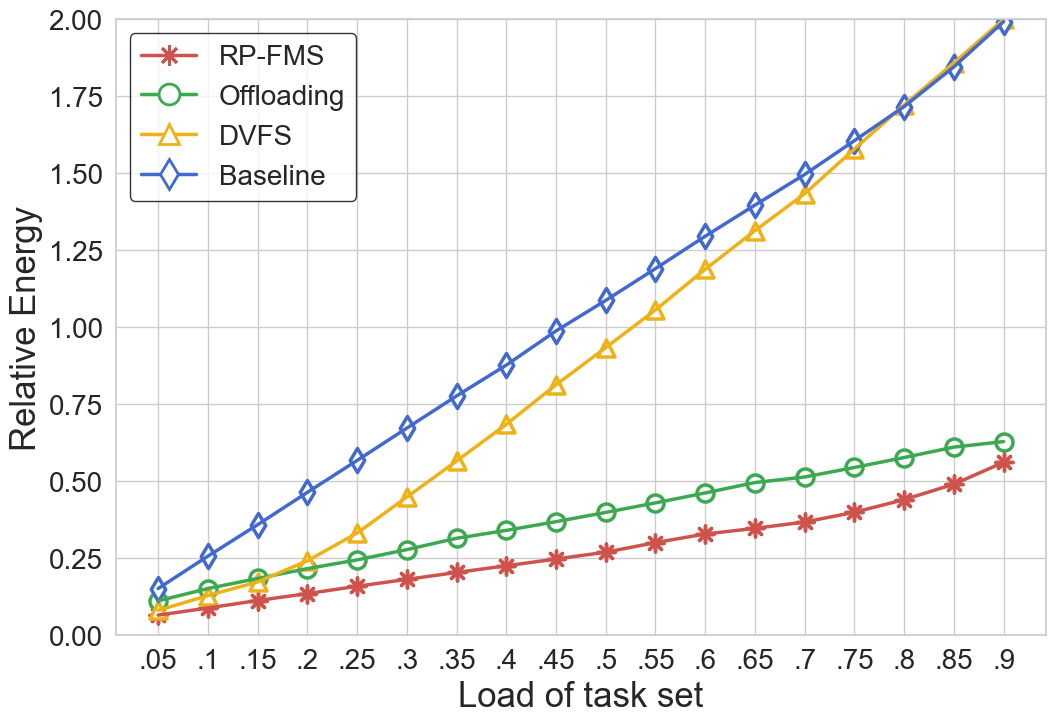

In [2]:
# 소수점 앞, 소수 뒤의 0 제거
def custom_formatter(x, pos):
    formatted = f"{x:.2f}".lstrip('0')  # '0.05' → '.05', '0.10' → '.10'
    return formatted.rstrip('0').rstrip('.')  # '.10' → '.1', '.90' → '.9'

sns.set_theme(style="whitegrid")

# y축 범위를 2로 설정 -> 최댓값 54.45 / 2 = 27.225
tovs.loc[:, "Power"] /= 27.225
offloading.loc[:, "Power"] /= 27.225
dvfs.loc[:, "Power"] /= 27.225
nothing.loc[:, "Power"] /= 27.225

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim(0, 2)  # y축 범위 0~2

sns.lineplot(x=tovs["Workload"], y=tovs["Power"], color="#CD534C", linewidth=2.5, ax=ax)
sns.lineplot(x=offloading["Workload"], y=offloading["Power"], color="#3CA951", linewidth=2.5, ax=ax)
sns.lineplot(x=dvfs["Workload"], y=dvfs["Power"], color="#EFB118", linewidth=2.5, ax=ax)
sns.lineplot(x=nothing["Workload"], y=nothing["Power"], color="#4269D0", linewidth=2.5, ax=ax)

# 마커 추가
ax.scatter(tovs["Workload"], tovs["Power"], color="#CD534C", marker=(8, 2, 0), s=150, linewidth=2.5)
ax.scatter(offloading["Workload"], offloading["Power"], color="#3CA951", marker="o", s=150, facecolor="white",linewidth=2.5)
ax.scatter(dvfs["Workload"], dvfs["Power"], color="#EFB118", marker="^", s=150, facecolor="white",linewidth=2.5)
ax.scatter(nothing["Workload"], nothing["Power"], color="#4269D0", marker="d", s=150, facecolor="white",linewidth=2.5)

# 범례
tovs_legend = mlines.Line2D([], [], color="#CD534C", marker=(8, 2, 0), markersize=15, markerfacecolor="white", label="RP-FMS", linewidth=2.5, markeredgewidth=2)
offloading_legend = mlines.Line2D([], [], color="#3CA951", marker="o", markersize=15, markerfacecolor="white", label="Offloading", linewidth=2.5, markeredgewidth=2)
dvfs_legend = mlines.Line2D([], [], color="#EFB118", marker="^", markersize=15, markerfacecolor="white", label="DVFS", linewidth=2.5, markeredgewidth=2)
nothing_legend = mlines.Line2D([], [], color="#4269D0", marker="d", markersize=15, markerfacecolor="white", label="Baseline", linewidth=2.5, markeredgewidth=2)

plt.legend(handles=[tovs_legend, offloading_legend, dvfs_legend, nothing_legend], fontsize=20, frameon=True, edgecolor="black", loc="upper left", bbox_to_anchor=(0, 1))

ax.set_xlabel("Load of task set", fontsize=25)
ax.set_ylabel("Relative Energy", fontsize=25)
ax.set_xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9])
ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Load_of_Task_Set_vs_Relative_Energy.png", bbox_inches="tight")
plt.show()

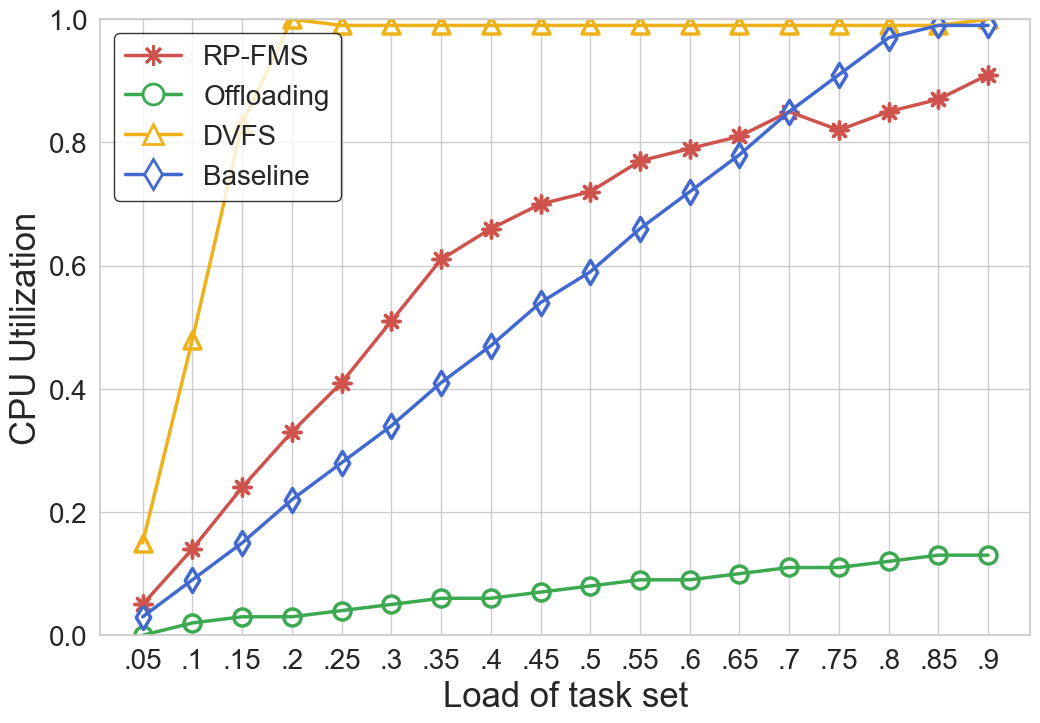

In [3]:
def custom_formatter(x, pos):
    formatted = f"{x:.2f}".lstrip('0') 
    return formatted.rstrip('0').rstrip('.') 

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim(0, 1) 

sns.lineplot(x=tovs["Workload"], y=tovs["Util"], color="#CD534C", linewidth=2.5, ax=ax)
sns.lineplot(x=offloading["Workload"], y=offloading["Util"], color="#3CA951", linewidth=2.5, ax=ax)
sns.lineplot(x=dvfs["Workload"], y=dvfs["Util"], color="#EFB118", linewidth=2.5, ax=ax)
sns.lineplot(x=nothing["Workload"], y=nothing["Util"], color="#4269D0", linewidth=2.5, ax=ax)

ax.scatter(tovs["Workload"], tovs["Util"], color="#CD534C", marker=(8, 2, 0), s=150, linewidth=2.5)
ax.scatter(offloading["Workload"], offloading["Util"], color="#3CA951", marker="o", s=150, facecolor="white",linewidth=2.5)
ax.scatter(dvfs["Workload"], dvfs["Util"], color="#EFB118", marker="^", s=150, facecolor="white",linewidth=2.5)
ax.scatter(nothing["Workload"], nothing["Util"], color="#4269D0", marker="d", s=150, facecolor="white",linewidth=2.5)

tovs_legend = mlines.Line2D([], [], color="#CD534C", marker=(8, 2, 0), markersize=15, markerfacecolor="white", label="RP-FMS", linewidth=2.5, markeredgewidth=2)
offloading_legend = mlines.Line2D([], [], color="#3CA951", marker="o", markersize=15, markerfacecolor="white", label="Offloading", linewidth=2.5, markeredgewidth=2)
dvfs_legend = mlines.Line2D([], [], color="#EFB118", marker="^", markersize=15, markerfacecolor="white", label="DVFS", linewidth=2.5, markeredgewidth=2)
nothing_legend = mlines.Line2D([], [], color="#4269D0", marker="d", markersize=15, markerfacecolor="white", label="Baseline", linewidth=2.5, markeredgewidth=2)

plt.legend(handles=[tovs_legend, offloading_legend, dvfs_legend, nothing_legend], fontsize=20, frameon=True, edgecolor="black", loc="upper left", bbox_to_anchor=(0, 1))

ax.set_xlabel("Load of task set", fontsize=25)
ax.set_ylabel("CPU Utilization", fontsize=25)
ax.set_xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9])
ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.grid()
plt.savefig("Load_of_Task_Set_vs_CPU_Utilization.png", bbox_inches="tight")
plt.show()

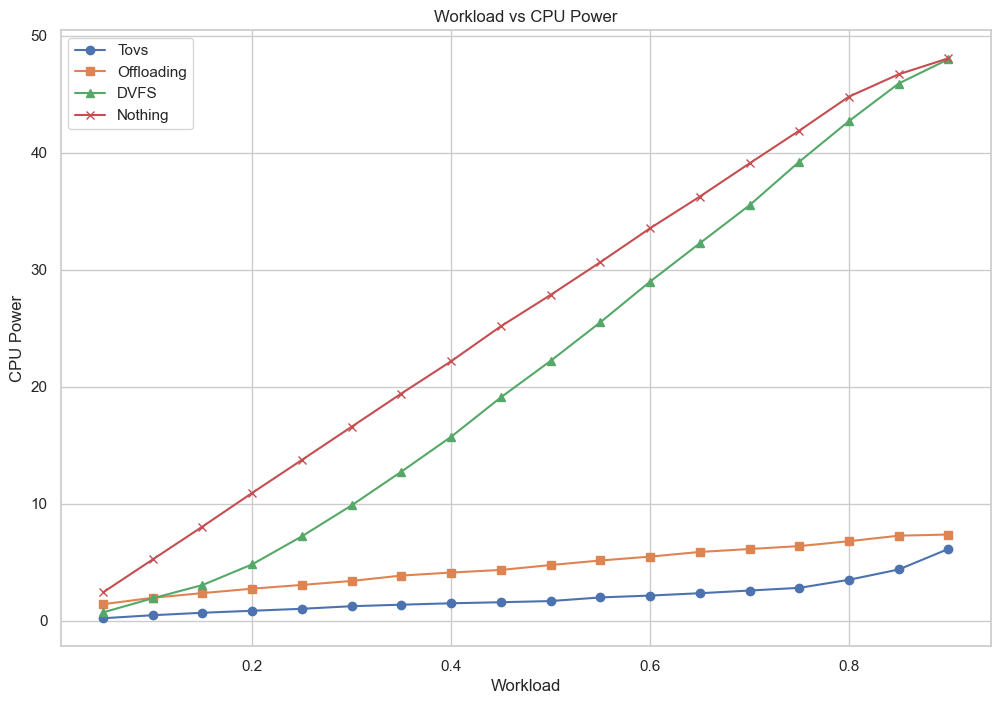

In [4]:
# Workload에 따른 CPU Power 증가
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tovs["Workload"], tovs["CPU_Power"], label="Tovs", marker="o")
ax.plot(offloading["Workload"], offloading["CPU_Power"], label="Offloading", marker="s")
ax.plot(dvfs["Workload"], dvfs["CPU_Power"], label="DVFS", marker="^")
ax.plot(nothing["Workload"], nothing["CPU_Power"], label="Nothing", marker="x")
ax.set_xlabel("Workload")
ax.set_ylabel("CPU Power")
ax.set_title("Workload vs CPU Power")
ax.legend()
plt.savefig("workload_vs_cpu_power.png")
plt.show()

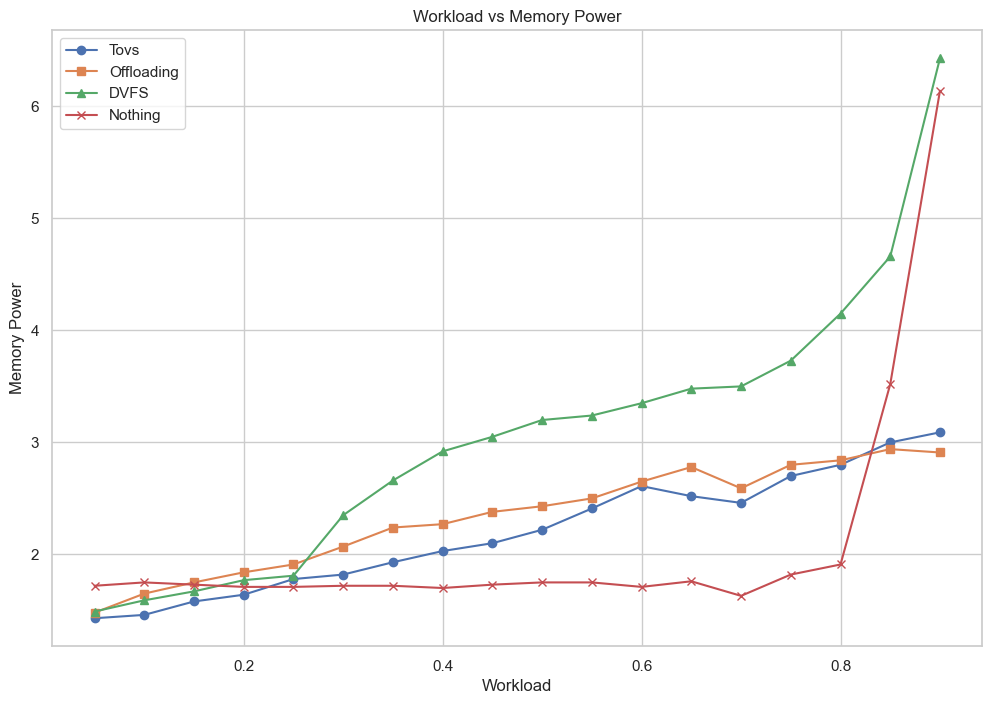

In [5]:
# Workload에 따른 Memory Power 증가
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tovs["Workload"], tovs["Memory_Power"], label="Tovs", marker="o")
ax.plot(offloading["Workload"], offloading["Memory_Power"], label="Offloading", marker="s")
ax.plot(dvfs["Workload"], dvfs["Memory_Power"], label="DVFS", marker="^")
ax.plot(nothing["Workload"], nothing["Memory_Power"], label="Nothing", marker="x")
ax.set_xlabel("Workload")
ax.set_ylabel("Memory Power")
ax.set_title("Workload vs Memory Power")
ax.legend()
plt.savefig("workload_vs_memory_power.png")
plt.show()

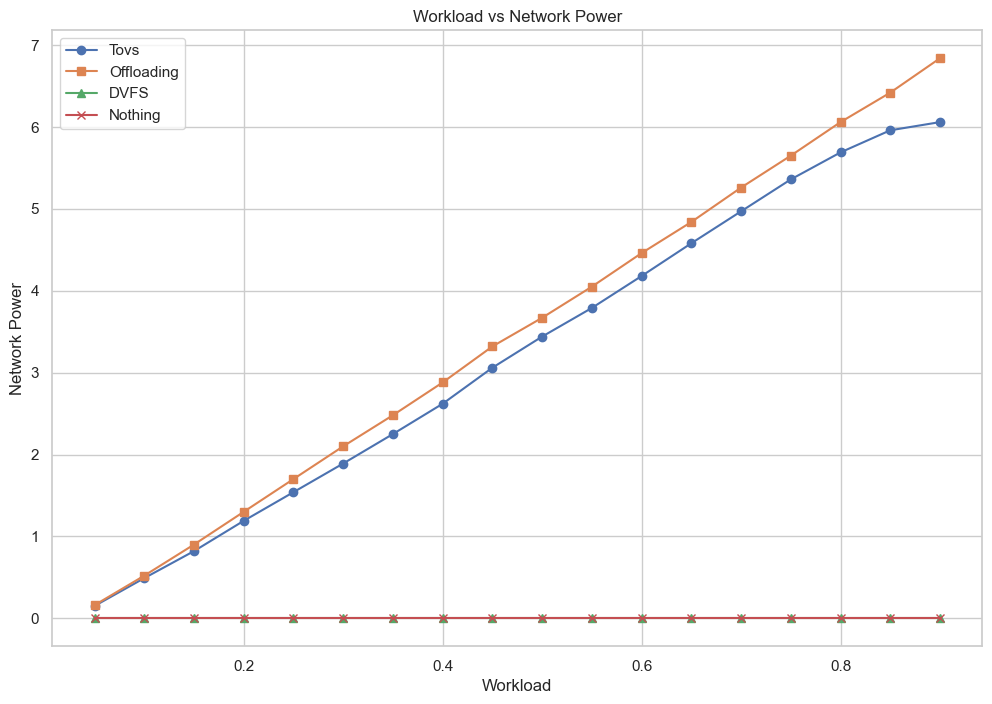

In [6]:
# Workload에 따른 Network Power 증가
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tovs["Workload"], tovs["Network_Power"], label="Tovs", marker="o")
ax.plot(offloading["Workload"], offloading["Network_Power"], label="Offloading", marker="s")
ax.plot(dvfs["Workload"], dvfs["Network_Power"], label="DVFS", marker="^")
ax.plot(nothing["Workload"], nothing["Network_Power"], label="Nothing", marker="x")
ax.set_xlabel("Workload")
ax.set_ylabel("Network Power")
ax.set_title("Workload vs Network Power")
ax.legend()
plt.savefig("workload_vs_network_power.png")
plt.show()

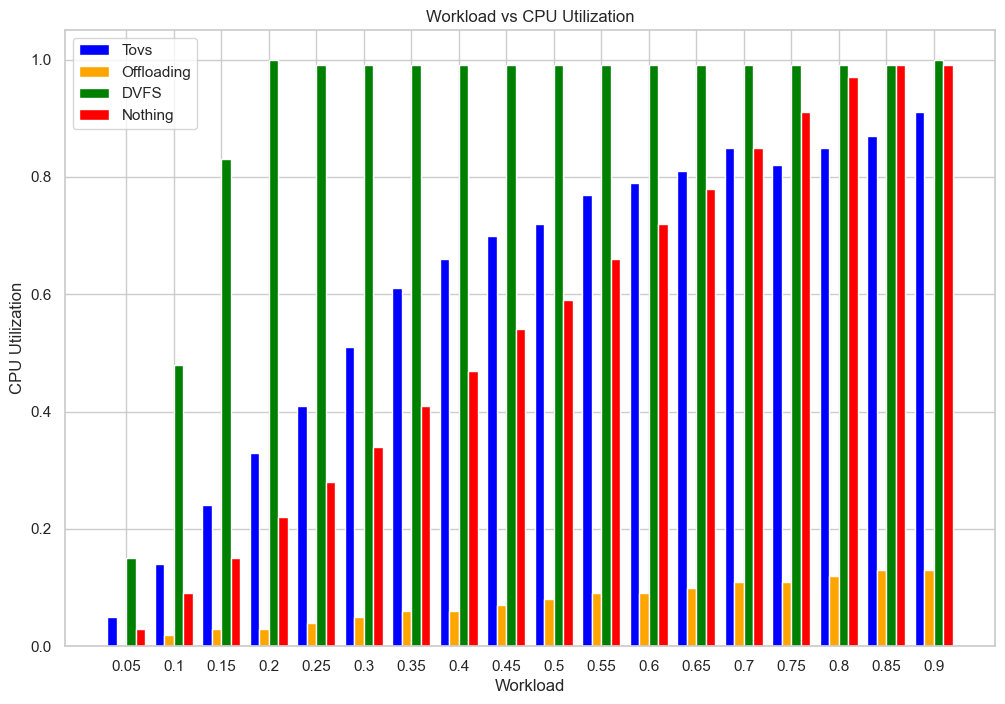

In [7]:
# Workload에 따른 CPU Utilization 비교
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
x = np.arange(len(tovs["Workload"]))

ax.bar(x - 1.5*bar_width, tovs["Util"], bar_width, label="Tovs", color="blue")
ax.bar(x - 0.5*bar_width, offloading["Util"], bar_width, label="Offloading", color="orange")
ax.bar(x + 0.5*bar_width, dvfs["Util"], bar_width, label="DVFS", color="green")
ax.bar(x + 1.5*bar_width, nothing["Util"], bar_width, label="Nothing", color="red")

ax.set_xlabel("Workload")
ax.set_ylabel("CPU Utilization")
ax.set_title("Workload vs CPU Utilization")
ax.set_xticks(x)
ax.set_xticklabels(tovs["Workload"].astype(str))
ax.legend()
plt.savefig("workload_vs_cpu_utilization.png")
plt.show()


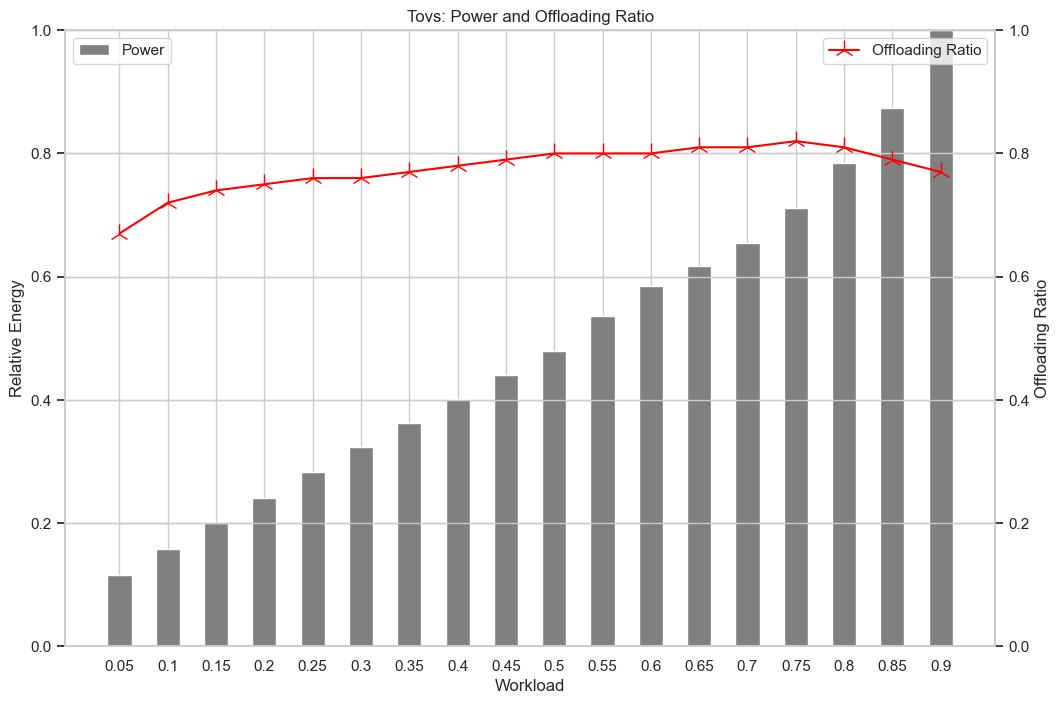

In [8]:
# Tovs) Power & Offloading Ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

relative_energies_tovs = tovs["Power"] / tovs["Power"].max()
index = np.arange(len(tovs["Workload"]))

ax1.bar(index, relative_energies_tovs, color='grey', width=0.5, label='Power')
ax2 = ax1.twinx()
ax2.plot(index, tovs["Offloading_Ratio"], marker='2', markersize=15, color='red', linestyle='-', label='Offloading Ratio')

ax1.set_xlabel('Workload')
ax1.set_ylabel('Relative Energy')
ax2.set_ylabel('Offloading Ratio')

ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 1.0)

ax1.set_xticks(index)
ax1.set_xticklabels(tovs["Workload"])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)

plt.title('Tovs: Power and Offloading Ratio')
plt.savefig('tovs_power_offloading_ratio.png')
plt.show()

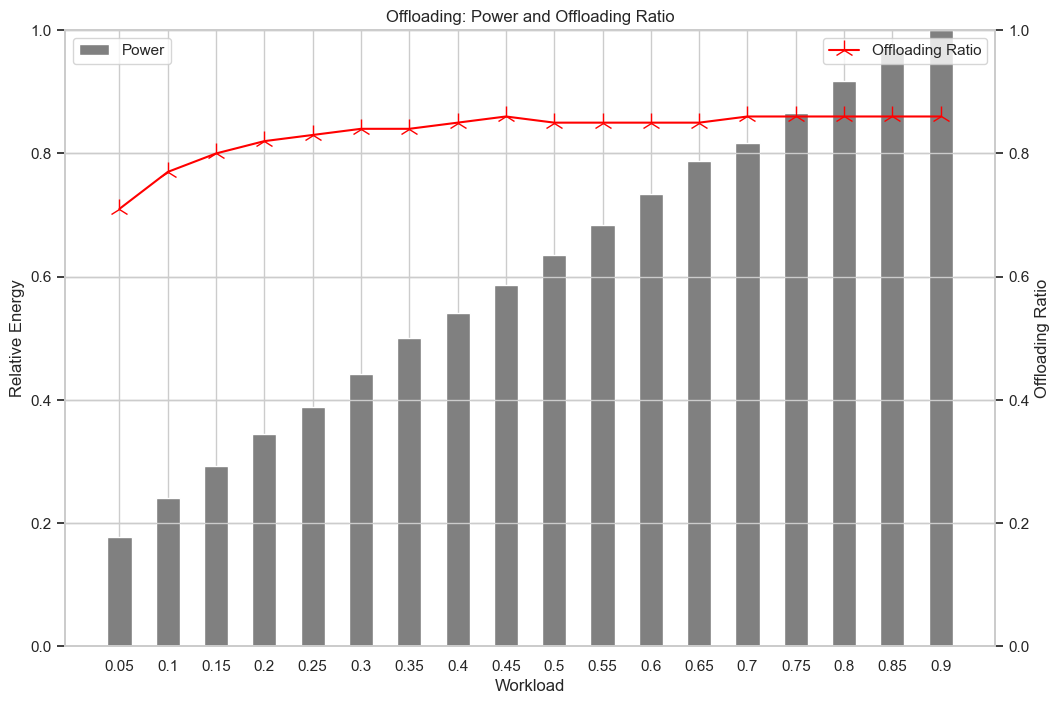

In [9]:
# Offloading) Power & Offloading Ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

relative_energies_offloading = offloading["Power"] / offloading["Power"].max()
index = np.arange(len(offloading["Workload"]))

ax1.bar(index, relative_energies_offloading, color='grey', width=0.5, label='Power')
ax2 = ax1.twinx()
ax2.plot(index, offloading["Offloading_Ratio"], marker='2', markersize=15, color='red', linestyle='-', label='Offloading Ratio')

ax1.set_xlabel('Workload')
ax1.set_ylabel('Relative Energy')
ax2.set_ylabel('Offloading Ratio')

ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 1.0)

ax1.set_xticks(index)
ax1.set_xticklabels(offloading["Workload"])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)

plt.title('Offloading: Power and Offloading Ratio')
plt.savefig('offloading_power_offloading_ratio.png')
plt.show()

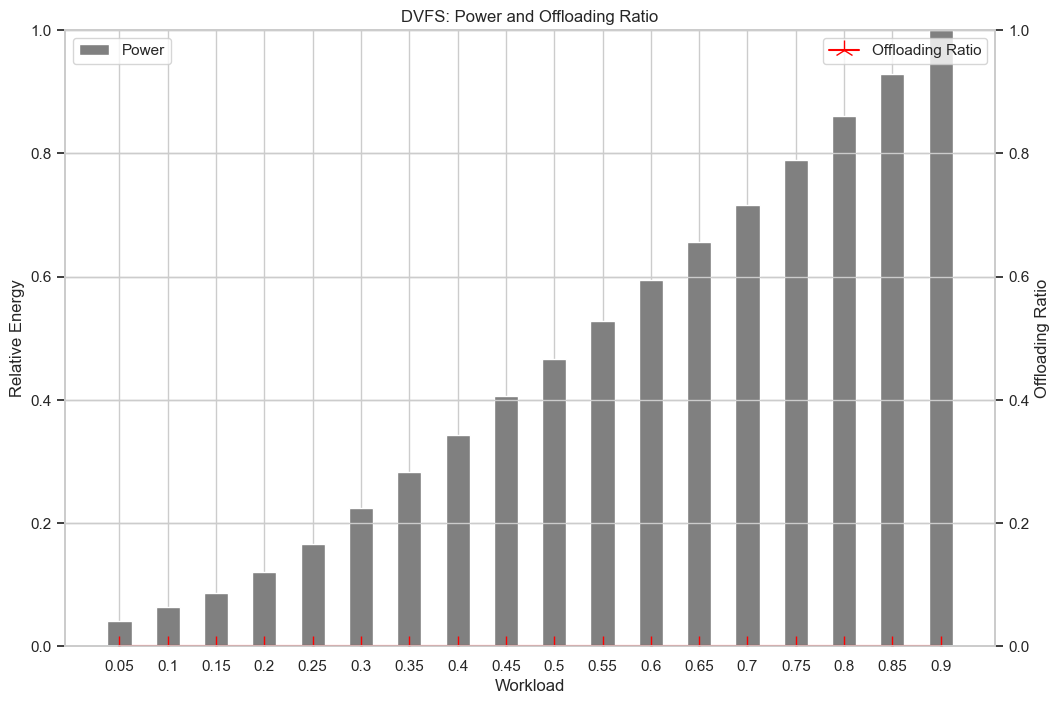

In [10]:
# DVFS) Power & Offloading Ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

relative_energies_dvfs = dvfs["Power"] / dvfs["Power"].max()
index = np.arange(len(dvfs["Workload"]))

ax1.bar(index, relative_energies_dvfs, color='grey', width=0.5, label='Power')
ax2 = ax1.twinx()
ax2.plot(index, dvfs["Offloading_Ratio"], marker='2', markersize=15, color='red', linestyle='-', label='Offloading Ratio')

ax1.set_xlabel('Workload')
ax1.set_ylabel('Relative Energy')
ax2.set_ylabel('Offloading Ratio')

ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 1.0)

ax1.set_xticks(index)
ax1.set_xticklabels(dvfs["Workload"])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)

plt.title('DVFS: Power and Offloading Ratio')
plt.savefig('dvfs_power_offloading_ratio.png')
plt.show()

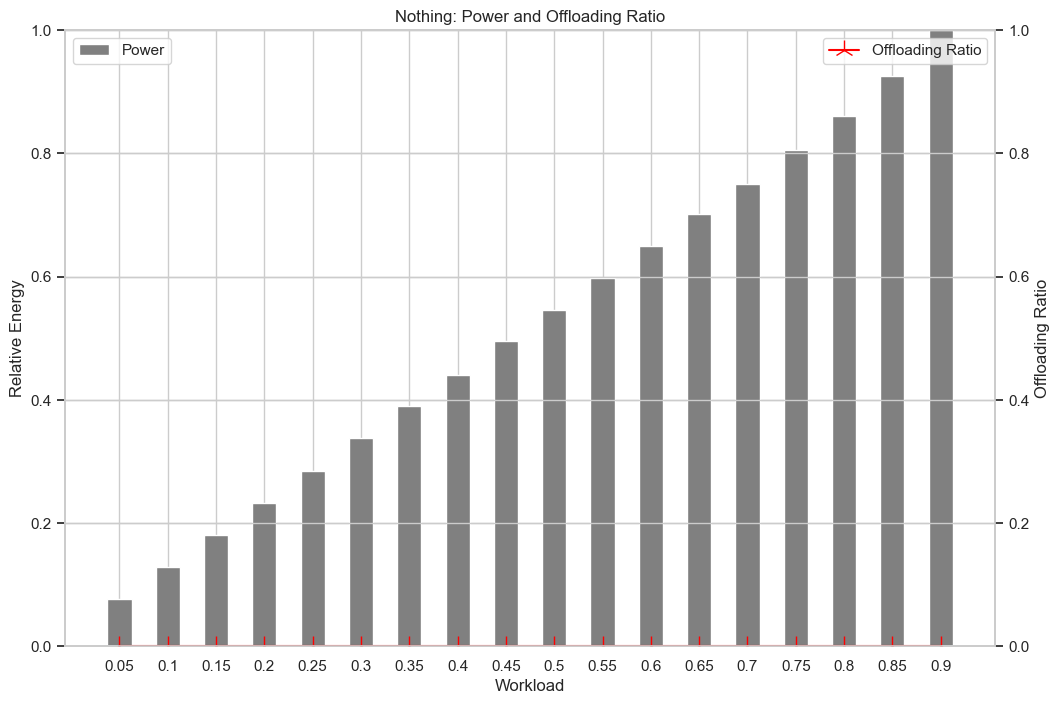

In [11]:
# Nothing) Power & Offloading Ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

relative_energies_nothing = nothing["Power"] / nothing["Power"].max()
index = np.arange(len(nothing["Workload"]))

ax1.bar(index, relative_energies_nothing, color='grey', width=0.5, label='Power')
ax2 = ax1.twinx()
ax2.plot(index, nothing["Offloading_Ratio"], marker='2', markersize=15, color='red', linestyle='-', label='Offloading Ratio')

ax1.set_xlabel('Workload')
ax1.set_ylabel('Relative Energy')
ax2.set_ylabel('Offloading Ratio')

ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 1.0)

ax1.set_xticks(index)
ax1.set_xticklabels(nothing["Workload"])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)

plt.title('Nothing: Power and Offloading Ratio')
plt.savefig('nothing_power_offloading_ratio.png')
plt.show()

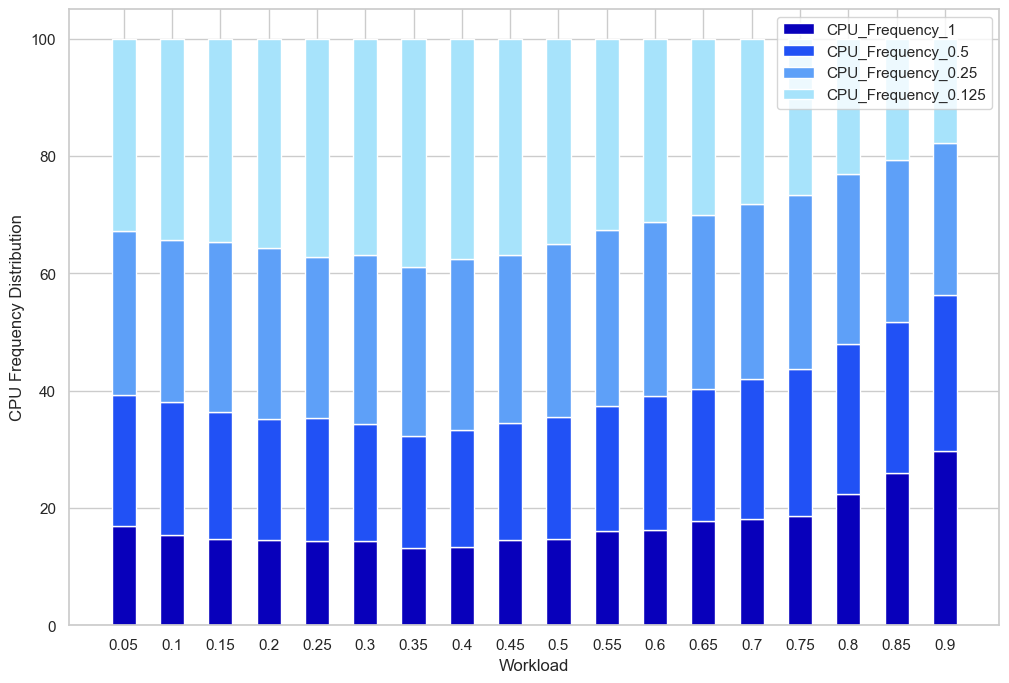

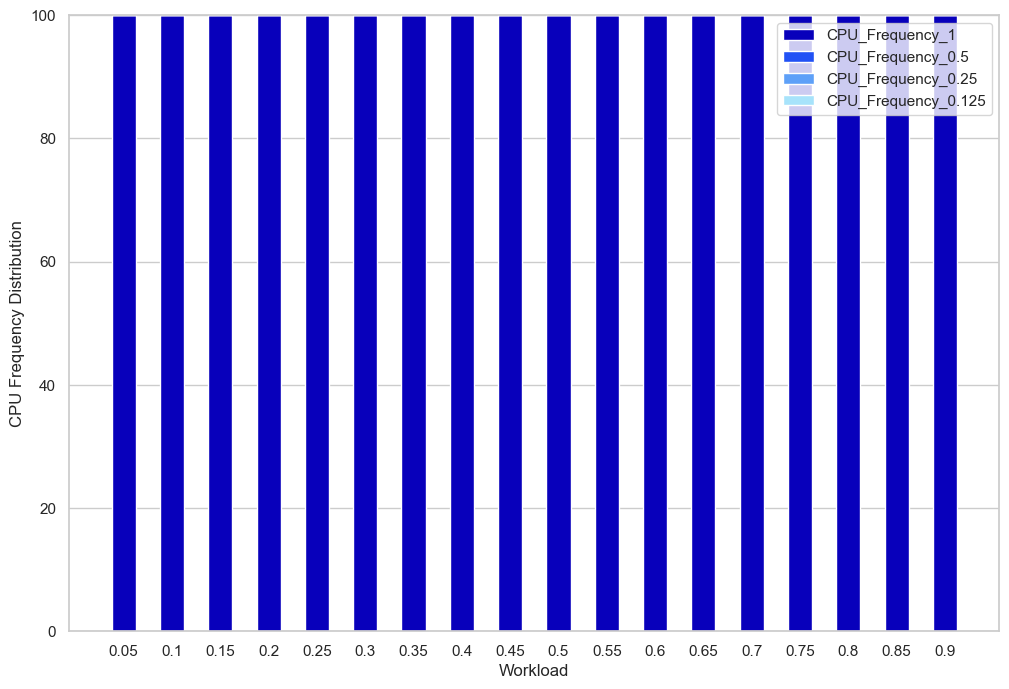

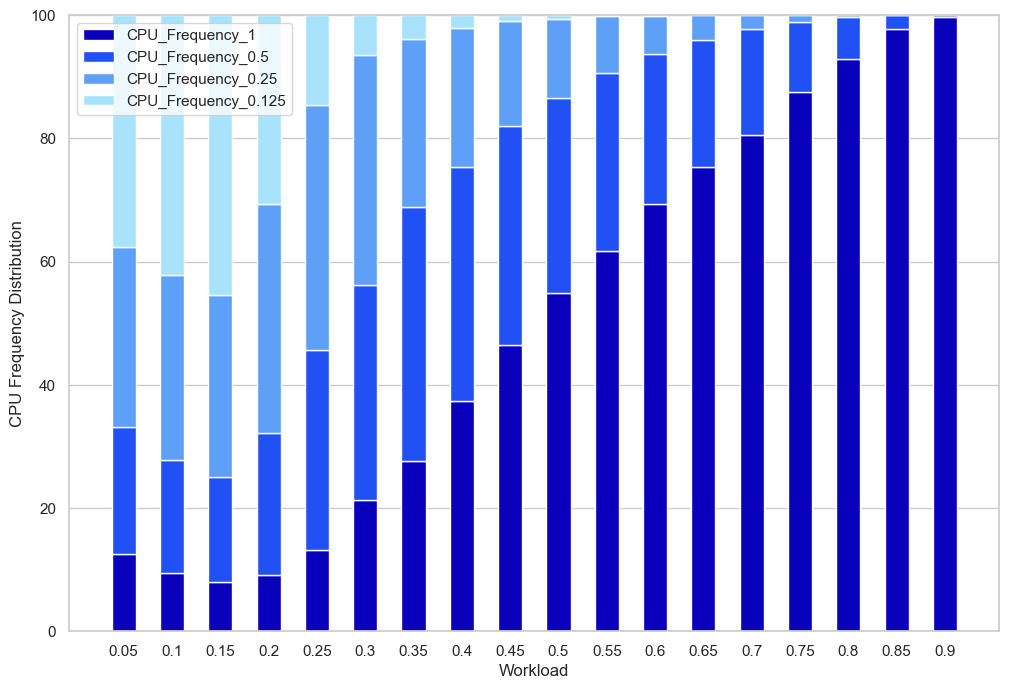

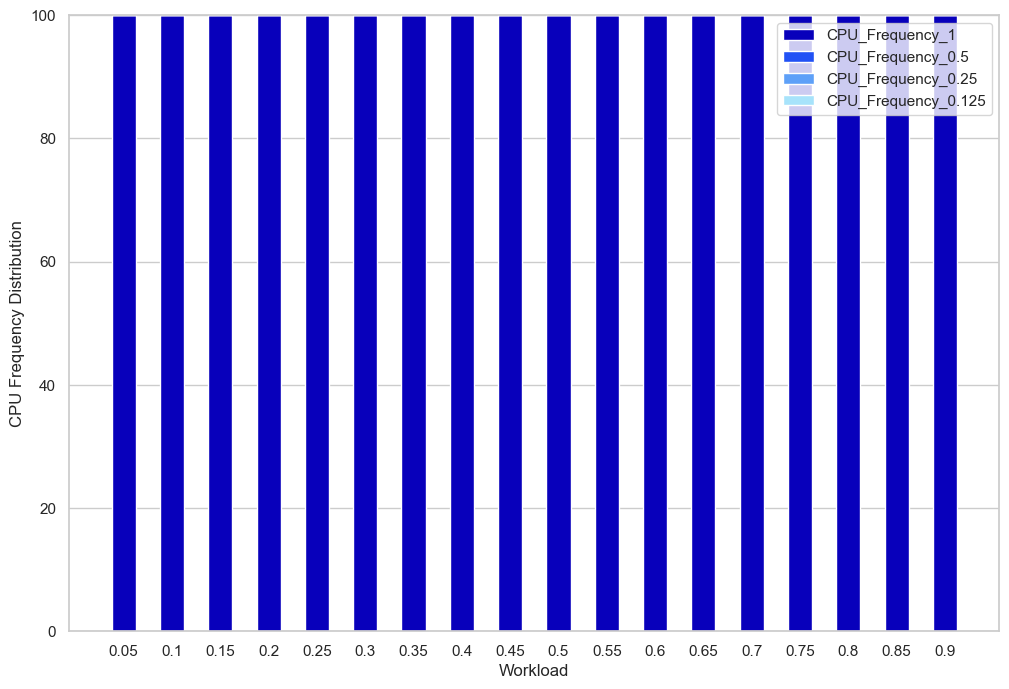

In [12]:
# CPU Frequency
def plot_cpu_frequency(section_data, section_name):
    categories = ["CPU_Frequency_1", "CPU_Frequency_0.5", "CPU_Frequency_0.25", "CPU_Frequency_0.125"]
    colors = {
        "CPU_Frequency_1": "#0800BB",
        "CPU_Frequency_0.5": "#2151F5",
        "CPU_Frequency_0.25": "#5EA0F8",
        "CPU_Frequency_0.125": "#A7E3FB"
    }

    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.5
    index = np.arange(len(section_data["Workload"]))

    bottoms = np.zeros(len(section_data["Workload"]))
    for category in categories:
        values = section_data[category]
        ax.bar(index, values, bar_width, label=category, bottom=bottoms, color=colors[category])
        bottoms += values

    ax.set_xlabel("Workload")
    ax.set_ylabel("CPU Frequency Distribution")
    ax.set_xticks(index)
    ax.set_xticklabels(section_data["Workload"].astype(str))
    ax.legend()
    plt.savefig(f"{section_name.lower()}_cpu_frequency_distribution.png")
    plt.show()

plot_cpu_frequency(tovs, "Tovs")
plot_cpu_frequency(offloading, "Offloading")
plot_cpu_frequency(dvfs, "DVFS")
plot_cpu_frequency(nothing, "Nothing")

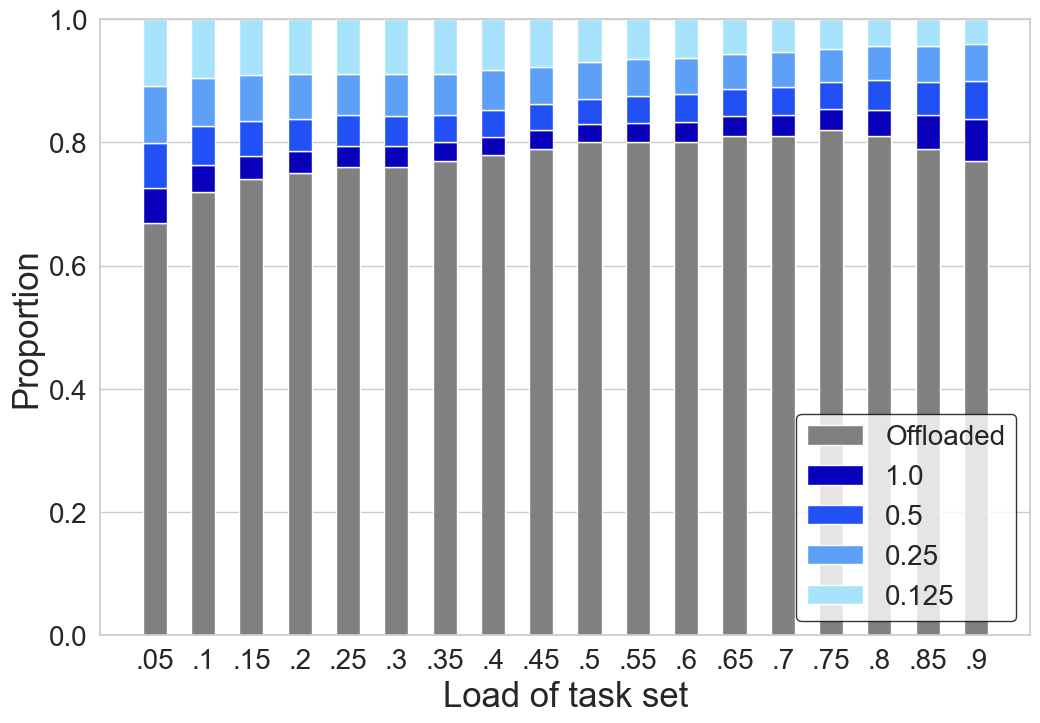

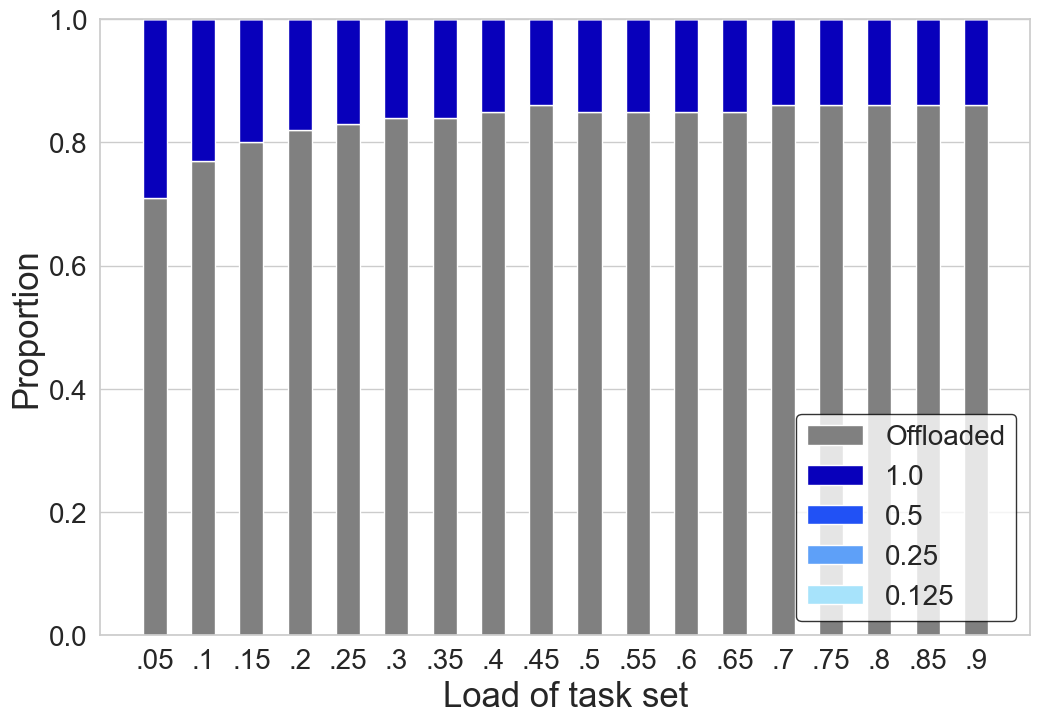

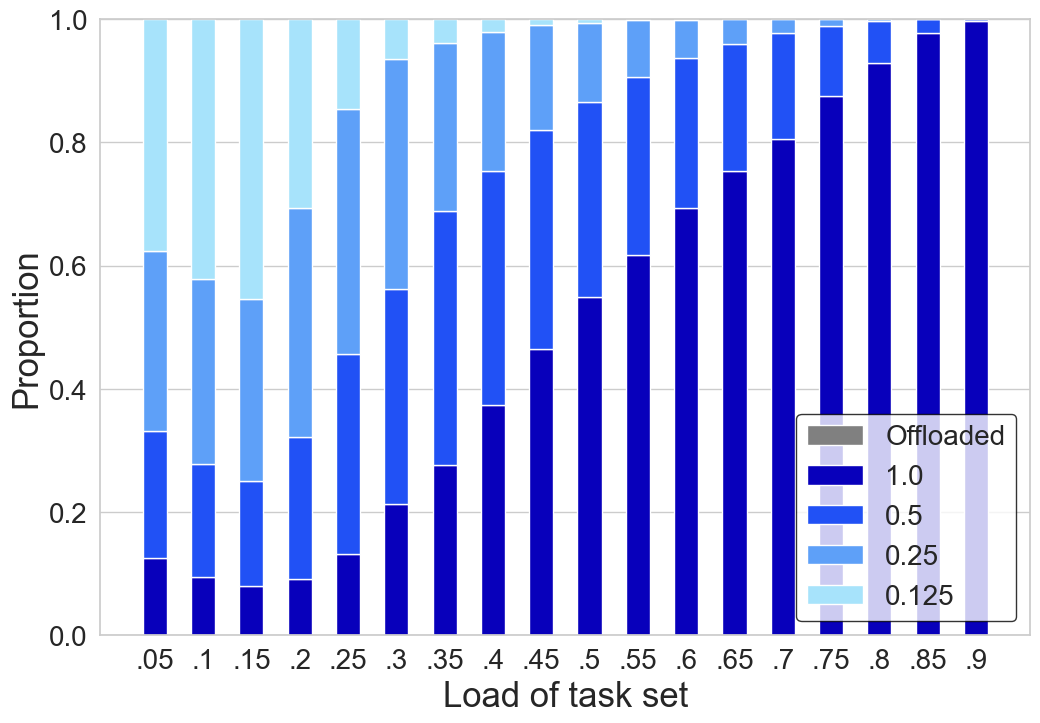

In [13]:
def custom_formatter(x, pos):
    formatted = f"{x:.2f}".lstrip('0')  
    return formatted.rstrip('0').rstrip('.')  

def plot_frequency_distribution(section_data, section_name, legend_labels):
    categories = ["CPU_Frequency_1", "CPU_Frequency_0.5", "CPU_Frequency_0.25", "CPU_Frequency_0.125"]
    colors = {
        "Offloading_Ratio": "grey",
        "CPU_Frequency_1": "#0800BB",
        "CPU_Frequency_0.5": "#2151F5",
        "CPU_Frequency_0.25": "#5EA0F8",
        "CPU_Frequency_0.125": "#A7E3FB"
    }

    cpu_frequencies_normalized = section_data[categories].div(section_data[categories].sum(axis=1), axis=0) * (1 - section_data["Offloading_Ratio"]).values[:, None]
    section_normalized = pd.concat([section_data["Workload"], section_data["Offloading_Ratio"], cpu_frequencies_normalized], axis=1)

    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.5
    index = np.arange(len(section_normalized["Workload"]))
    bottoms = np.zeros(len(section_normalized["Workload"]))

    for category in ["Offloading_Ratio"] + categories:
        values = section_normalized[category]
        ax.bar(index, values, bar_width, label=legend_labels[category], bottom=bottoms, color=colors[category])
        bottoms += values

    plt.legend(fontsize=20, frameon=True, edgecolor="black", loc="lower right", bbox_to_anchor=(1, 0))
    ax.set_ylim(0, 1)  # y축 범위 0~1
    ax.set_xlabel('Load of task set', fontsize=25)
    ax.set_ylabel('Proportion', fontsize=25)
    ax.set_xticks(index)
    ax.set_xticklabels([f'{x:.2f}'.lstrip('0').rstrip('0').rstrip('.') for x in section_normalized["Workload"]])
   
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig(f'{section_name.lower()}_cpu_frequency_offloading_ratio.png', bbox_inches="tight")
    plt.show()

legend_labels = {
    "Offloading_Ratio": "Offloaded",
    "CPU_Frequency_1": "1.0",
    "CPU_Frequency_0.5": "0.5",
    "CPU_Frequency_0.25": "0.25",
    "CPU_Frequency_0.125":"0.125",
}

# Tovs / RP-FMS
plot_frequency_distribution(tovs, "Tovs", legend_labels)

# Offloading
plot_frequency_distribution(offloading, "Offloading", legend_labels)

# DVFS
plot_frequency_distribution(dvfs, "DVFS", legend_labels)

